### Maternal Health Risk using EDA and machine learning

### Dataset Information
Age: Usia dalam tahun ketika seorang wanita hamil.<br>
SystolicBP: Nilai atas Tekanan Darah dalam mmHg, atribut penting lainnya selama kehamilan. <br>
DiastolicBP: Nilai Tekanan Darah yang lebih rendah dalam mmHg, atribut penting lainnya selama kehamilan. <br>
BodyTemp : dalam F<br>
BS: Kadar glukosa darah dinyatakan dalam konsentrasi molar, mmol/L. <br>
HeartRate: Detak jantung istirahat normal dalam denyut per menit. <br>
RiskLevel: Prediksi Tingkat Intensitas Risiko selama kehamilan dengan mempertimbangkan atribut sebelumnya.

### Import Data dan Prepocessing

In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,f1_score,recall_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
df[df['Age'] <= 16]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
15,15,120,80,7.01,98.0,70,low risk
19,10,70,50,6.90,98.0,70,low risk
25,16,100,70,7.20,98.0,80,low risk
35,12,95,60,6.10,102.0,60,low risk
48,15,76,49,7.50,98.0,77,low risk
...,...,...,...,...,...,...,...
957,14,90,65,7.00,101.0,70,high risk
963,12,90,60,7.90,102.0,66,high risk
996,12,90,60,8.00,102.0,66,high risk
1000,12,90,60,11.00,102.0,60,high risk


In [4]:
df['Age'] = df['Age'].mask(df['Age']<16, 16)

In [5]:
df[df['Age'] < 16]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel


In [6]:
df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [7]:
df['BodyTemp']=(df['BodyTemp'] - 32) * 5/9

In [8]:
df['BodyTemp']

0       36.666667
1       36.666667
2       37.777778
3       36.666667
4       36.666667
          ...    
1009    36.666667
1010    36.666667
1011    36.666667
1012    36.666667
1013    38.333333
Name: BodyTemp, Length: 1014, dtype: float64

In [9]:
df['BodyTemp'] = df['BodyTemp'].round(decimals=1)

In [10]:
df['BodyTemp']

0       36.7
1       36.7
2       37.8
3       36.7
4       36.7
        ... 
1009    36.7
1010    36.7
1011    36.7
1012    36.7
1013    38.3
Name: BodyTemp, Length: 1014, dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [12]:
df.shape

(1014, 7)

In [13]:
#Miss Valuse
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [14]:
#Duplicated value 
data_dup = df.duplicated().any()
data_dup

True

In [15]:
df.duplicated().sum()

562

In [16]:
df = df.drop_duplicates()

In [17]:
data_dup = df.duplicated().any()
data_dup

False

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 705
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          452 non-null    int64  
 1   SystolicBP   452 non-null    int64  
 2   DiastolicBP  452 non-null    int64  
 3   BS           452 non-null    float64
 4   BodyTemp     452 non-null    float64
 5   HeartRate    452 non-null    int64  
 6   RiskLevel    452 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 28.2+ KB


In [19]:
df.shape

(452, 7)

In [20]:
ca_val=[]
co_val=[]

for column in df.columns:
    if df[column].nunique() <=10:
        ca_val.append(column)
    else:
        co_val.append(column)

In [21]:
#Categorical Data
ca_val

['BodyTemp', 'RiskLevel']

In [22]:
df['BodyTemp'].unique()

array([36.7, 37.8, 38.9, 38.3, 39.4, 36.9, 37.2, 37. ])

In [23]:
df['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [24]:
co_val

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate']

In [25]:
df['Age'].unique()

array([25, 35, 29, 30, 23, 32, 42, 19, 20, 48, 16, 50, 40, 21, 18, 22, 49,
       28, 60, 55, 45, 31, 17, 26, 54, 44, 33, 34, 38, 39, 63, 37, 51, 62,
       43, 65, 66, 56, 70, 27, 36, 59, 24, 41, 46], dtype=int64)

In [26]:
df['SystolicBP'].unique()

array([130, 140,  90, 120,  85, 110,  70, 100,  75,  95,  76,  80, 115,
       135, 160, 129,  83,  99,  78], dtype=int64)

In [27]:
df['DiastolicBP'].unique()

array([ 80,  90,  70,  85,  60,  89,  75, 100,  50,  65,  95,  49,  63,
        69,  76,  68], dtype=int64)

In [28]:
df['BS'].unique()

array([15.  , 13.  ,  8.  ,  7.  ,  6.1 ,  7.01, 11.  ,  6.9 , 18.  ,
        6.7 ,  7.5 ,  7.2 ,  7.1 ,  6.4 ,  9.  ,  6.  ,  7.7 , 12.  ,
       16.  ,  7.8 ,  6.8 ,  7.9 , 17.  , 19.  , 10.  ,  6.3 ,  6.6 ,
        6.5 ,  7.6 ])

In [29]:
df['HeartRate'].unique()

array([86, 70, 80, 76, 78, 77, 88, 90, 66, 82, 60, 75, 67, 65, 68,  7],
      dtype=int64)

In [30]:
RiskLevel = {'low risk':1, 
        'mid risk':2, 
        'high risk':3}

#membuat encodding 
df['RiskLevel'] = df['RiskLevel'].map(RiskLevel).astype(float)
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,36.7,86,3.0
1,35,140,90,13.0,36.7,70,3.0
2,29,90,70,8.0,37.8,80,3.0
3,30,140,85,7.0,36.7,70,3.0
4,35,120,60,6.1,36.7,76,1.0
...,...,...,...,...,...,...,...
673,16,100,50,6.4,36.7,70,2.0
674,16,100,60,6.0,36.7,80,1.0
703,16,100,49,7.6,36.7,77,1.0
704,16,100,50,6.0,36.7,70,2.0


In [31]:
df['RiskLevel'].value_counts()

1.0    234
3.0    112
2.0    106
Name: RiskLevel, dtype: int64

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,452.0,29.526549,13.397445,16.0,19.0,25.0,35.0,70.0
SystolicBP,452.0,110.553097,17.872282,70.0,90.0,120.0,120.0,160.0
DiastolicBP,452.0,75.418142,13.754578,49.0,65.0,80.0,86.0,100.0
BS,452.0,8.346173,2.829209,6.0,6.9,7.5,7.9,19.0
BodyTemp,452.0,37.074336,0.765443,36.7,36.7,36.7,36.7,39.4
HeartRate,452.0,73.949115,8.156973,7.0,70.0,76.0,80.0,90.0
RiskLevel,452.0,1.730088,0.833169,1.0,1.0,1.0,2.0,3.0


In [33]:
df[df['RiskLevel'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,234.0,27.696581,13.520523,16.0,18.0,22.0,33.5,70.0
SystolicBP,234.0,105.435897,15.505438,70.0,90.0,100.0,120.0,129.0
DiastolicBP,234.0,72.730769,13.081789,49.0,60.0,75.0,80.0,100.0
BS,234.0,7.201838,0.568363,6.0,6.9,7.2,7.5,11.0
BodyTemp,234.0,36.894872,0.601336,36.7,36.7,36.7,36.7,39.4
HeartRate,234.0,72.760684,8.230739,7.0,70.0,70.0,77.0,88.0
RiskLevel,234.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [34]:
df[df['RiskLevel'] == 2].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,106.0,28.896226,12.290088,16.0,19.0,25.5,32.0,60.0
SystolicBP,106.0,112.405660,15.059108,70.0,100.0,120.0,120.0,140.0
DiastolicBP,106.0,74.886792,12.166559,50.0,65.0,77.5,85.0,100.0
BS,106.0,7.893585,2.383055,6.0,6.8,7.0,7.8,18.0
BodyTemp,106.0,37.164151,0.796802,36.7,36.7,36.7,37.8,39.4
HeartRate,106.0,73.896226,7.000584,60.0,70.0,76.0,78.0,88.0
RiskLevel,106.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


In [35]:
df[df['RiskLevel'] == 3].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,112.0,33.946429,13.248722,16.0,25.00,33.5,42.0,65.0
SystolicBP,112.0,119.491071,20.965435,83.0,98.75,120.0,140.0,160.0
DiastolicBP,112.0,81.535714,14.703023,60.0,68.00,80.0,95.0,100.0
BS,112.0,11.165357,3.936601,6.1,7.65,11.0,15.0,19.0
BodyTemp,112.0,37.364286,0.927639,36.7,36.70,36.7,38.3,39.4
HeartRate,112.0,76.482143,8.504352,60.0,70.00,77.0,80.0,90.0
RiskLevel,112.0,3.000000,0.000000,3.0,3.00,3.0,3.0,3.0


<AxesSubplot:>

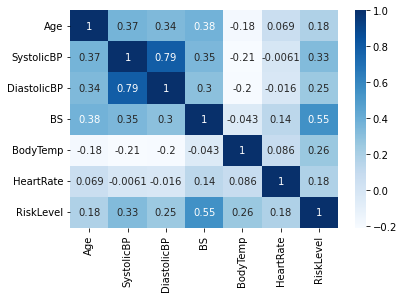

In [36]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

<AxesSubplot:xlabel='RiskLevel', ylabel='count'>

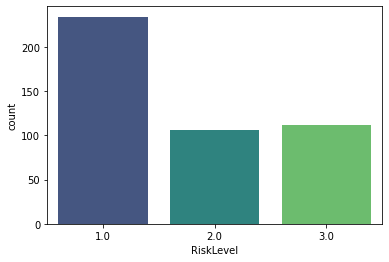

In [37]:
df['RiskLevel'].value_counts()

df['RiskLevel'].value_counts() * 100 / len(df)


sns.countplot(x='RiskLevel', data=df, palette='viridis')

In [38]:
df.to_csv("Data Cleaning new.csv", index=False)

### Modelling 

In [39]:
X = df.drop('RiskLevel',axis=1)
y = df['RiskLevel']

In [40]:
X

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,36.7,86
1,35,140,90,13.0,36.7,70
2,29,90,70,8.0,37.8,80
3,30,140,85,7.0,36.7,70
4,35,120,60,6.1,36.7,76
...,...,...,...,...,...,...
673,16,100,50,6.4,36.7,70
674,16,100,60,6.0,36.7,80
703,16,100,49,7.6,36.7,77
704,16,100,50,6.0,36.7,70


In [41]:
y

0      3.0
1      3.0
2      3.0
3      3.0
4      1.0
      ... 
673    2.0
674    1.0
703    1.0
704    2.0
705    1.0
Name: RiskLevel, Length: 452, dtype: float64

In [42]:
#Splitting The Dataset

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)
y_test

425    3.0
39     1.0
492    2.0
484    1.0
192    3.0
      ... 
673    2.0
150    1.0
95     2.0
57     1.0
269    1.0
Name: RiskLevel, Length: 91, dtype: float64

In [43]:
print(f'Training Shape x:',X_train.shape)
print(f'Testing Shape x:',X_test.shape)
print('*****___________*****___________*****')
print(f'Training Shape y:',X.shape)
print(f'Testing Shape y:',y.shape)

Training Shape x: (361, 6)
Testing Shape x: (91, 6)
*****___________*****___________*****
Training Shape y: (452, 6)
Testing Shape y: (452,)


In [44]:
#StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)

X_test= ss.transform(X_test)

In [45]:
X_train

array([[-0.63677598,  0.52234102,  0.33227837, -0.30723597, -0.51213251,
         0.25870919],
       [-0.34262866,  1.6341636 ,  1.79244262, -0.48302512, -0.51213251,
         0.73460228],
       [-0.93092329, -1.42334849, -1.12788587,  0.23089406,  2.24352899,
         1.44844191],
       ...,
       [-0.93092329,  0.52234102,  0.33227837, -0.30723597,  2.24352899,
         0.25870919],
       [ 0.02505548,  0.52234102,  0.33227837,  0.23089406,  1.49198494,
         0.25870919],
       [ 0.3192028 , -1.42334849, -1.12788587,  0.94840076,  2.24352899,
         1.44844191]])

### Modelling

####  Decision tree tanpa imbalance memakai gini

In [46]:
#Applying Decision Tree
from sklearn import tree

#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(X_train, y_train)

print("Train accuracy:",decision_tree.score(X_train,y_train))
print("Test accuracy:",decision_tree.score(X_test,y_test))


y_pred = decision_tree.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(f'Precision:',precision(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, decision_tree.predict(X_test)))


Train accuracy: 0.9335180055401662
Test accuracy: 0.6703296703296703
[3. 1. 2. 2. 2. 1. 3. 3. 1. 1. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 3.
 3. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 2. 2. 1. 2. 1. 3. 2. 3.
 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 2. 1. 1. 1. 1. 1. 1. 2. 3. 3.
 1. 2. 3. 1. 1. 1. 1. 3. 3. 2. 2. 1. 1. 3. 1. 1. 1. 1. 1.]
CM: [[41  4  2]
 [16  8  2]
 [ 1  5 12]]
Accuracy: 67.03296703296702 %
              precision    recall  f1-score   support

         1.0       0.71      0.87      0.78        47
         2.0       0.47      0.31      0.37        26
         3.0       0.75      0.67      0.71        18

    accuracy                           0.67        91
   macro avg       0.64      0.62      0.62        91
weighted avg       0.65      0.67      0.65        91



####  Decision tree tanpa imblanace memakai Entropy

In [47]:
#Applying Decision Tree
from sklearn import tree

#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='entropy')

#Train DT based on scaled training set
decision_tree.fit(X_train, y_train)

print("Train accuracy:",decision_tree.score(X_train,y_train))
print("Test accuracy:",decision_tree.score(X_test,y_test))

y_pred = decision_tree.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, decision_tree.predict(X_test)))

Train accuracy: 0.9335180055401662
Test accuracy: 0.6593406593406593
[3. 1. 2. 2. 2. 1. 3. 3. 1. 1. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 3.
 3. 1. 3. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 3. 1. 2. 2. 1. 2. 1. 3. 2. 3.
 2. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 2. 1. 2. 3. 3.
 1. 2. 3. 1. 1. 1. 1. 3. 3. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1.]
CM: [[40  4  3]
 [15  8  3]
 [ 2  4 12]]
Accuracy: 65.93406593406593 %
              precision    recall  f1-score   support

         1.0       0.70      0.85      0.77        47
         2.0       0.50      0.31      0.38        26
         3.0       0.67      0.67      0.67        18

    accuracy                           0.66        91
   macro avg       0.62      0.61      0.61        91
weighted avg       0.64      0.66      0.64        91



#### Random Forest tanpa imblanace memakai gini 

In [48]:
#Applying RandomForest
from sklearn.ensemble import RandomForestClassifier

#Create Random Forest object
random_forest = RandomForestClassifier(criterion='gini')

#Train model
random_forest.fit(X_train, y_train)

print("Train accuracy:",random_forest.score(X_train,y_train))
print("Test accuracy:",random_forest.score(X_test,y_test))

y_pred = random_forest.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, random_forest.predict(X_test)))

Train accuracy: 0.9335180055401662
Test accuracy: 0.6703296703296703
[3. 1. 2. 2. 2. 1. 3. 3. 1. 1. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 3.
 3. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 2. 3. 1. 1. 2. 1. 2. 1. 3. 2. 3.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 2. 3. 3.
 1. 2. 3. 1. 1. 1. 1. 3. 3. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1.]
CM: [[42  3  2]
 [17  7  2]
 [ 2  4 12]]
Accuracy: 67.03296703296702 %
              precision    recall  f1-score   support

         1.0       0.69      0.89      0.78        47
         2.0       0.50      0.27      0.35        26
         3.0       0.75      0.67      0.71        18

    accuracy                           0.67        91
   macro avg       0.65      0.61      0.61        91
weighted avg       0.65      0.67      0.64        91



#### Random Forest tanpa imblanace memakai entropy

In [49]:
#Applying RandomForest
from sklearn.ensemble import RandomForestClassifier

#Create Random Forest object
random_forest = RandomForestClassifier(criterion='entropy')

#Train model
random_forest.fit(X_train, y_train)

print("Train accuracy:",random_forest.score(X_train,y_train))
print("Test accuracy:",random_forest.score(X_test,y_test))

y_pred = random_forest.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, random_forest.predict(X_test)))

Train accuracy: 0.9335180055401662
Test accuracy: 0.6813186813186813
[3. 1. 2. 2. 2. 1. 3. 3. 1. 1. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 3.
 3. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 2. 3. 1. 1. 2. 1. 2. 1. 3. 2. 3.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 2. 3. 3.
 1. 2. 3. 1. 1. 1. 1. 3. 3. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1.]
CM: [[43  2  2]
 [17  7  2]
 [ 2  4 12]]
Accuracy: 68.13186813186813 %
              precision    recall  f1-score   support

         1.0       0.69      0.91      0.79        47
         2.0       0.54      0.27      0.36        26
         3.0       0.75      0.67      0.71        18

    accuracy                           0.68        91
   macro avg       0.66      0.62      0.62        91
weighted avg       0.66      0.68      0.65        91



#### Random Forest dengan imblanace memakai gini 

In [54]:
# Import library yang dibutuhkan
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Oversampling dengan SMOTE
sm = RandomOverSampler(random_state=0)

X_res, y_res = sm.fit_resample(X, y)

# Split dataset menjadi data latih dan data uji
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Bangun model Random Forest
model = RandomForestClassifier(criterion='gini')
model.fit(X_train_res, y_train_res)

# Prediksi hasil dengan menggunakan model
y_pred = model.predict(X_test_res)

# Hitung metrik-metrik evaluasi model
print(confusion_matrix(y_test_res, y_pred))
print(classification_report(y_test_res, y_pred))

[[36  8  1]
 [ 9 38  5]
 [ 1  3 40]]
              precision    recall  f1-score   support

         1.0       0.78      0.80      0.79        45
         2.0       0.78      0.73      0.75        52
         3.0       0.87      0.91      0.89        44

    accuracy                           0.81       141
   macro avg       0.81      0.81      0.81       141
weighted avg       0.81      0.81      0.81       141



In [60]:
labels=np.unique(y_test_res)
labels

array([1., 2., 3.])

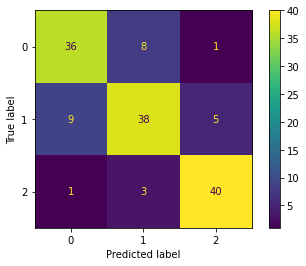

In [66]:
cmatrix = confusion_matrix(y_test_res, y_pred)
cm = ConfusionMatrixDisplay(cmatrix)
cm.plot()
plt.show()

In [68]:
!pip install mlxtend

     ---------------------------------------- 1.3/1.3 MB 1.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


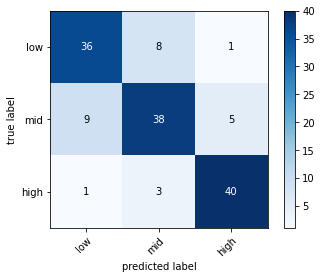

In [71]:
from mlxtend.plotting import plot_confusion_matrix
class_names = ['low', 'mid', 'high']

fig, ax = plot_confusion_matrix(conf_mat=cmatrix,
                                colorbar=True,
                                class_names=class_names)
plt.show()

In [62]:
cm

#### Random Forest dengan imblanace memakai entropy 

In [51]:
# Import library yang dibutuhkan
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Oversampling dengan SMOTE
sm = RandomOverSampler(random_state=0)

X_res, y_res = sm.fit_resample(X, y)

# Split dataset menjadi data latih dan data uji
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Bangun model Random Forest
model = RandomForestClassifier(criterion='entropy')
model.fit(X_train_res, y_train_res)

# Prediksi hasil dengan menggunakan model
y_pred = model.predict(X_test_res)

# Hitung metrik-metrik evaluasi model
print(confusion_matrix(y_test_res, y_pred))
print(classification_report(y_test_res, y_pred))

[[32 11  2]
 [11 38  3]
 [ 0  2 42]]
              precision    recall  f1-score   support

         1.0       0.74      0.71      0.73        45
         2.0       0.75      0.73      0.74        52
         3.0       0.89      0.95      0.92        44

    accuracy                           0.79       141
   macro avg       0.79      0.80      0.80       141
weighted avg       0.79      0.79      0.79       141



####  Decision Tree dengan imblanace memakai gini

In [52]:
# Import library yang dibutuhkan
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report

# Oversampling dengan SMOTE
sm = RandomOverSampler(random_state=0)

X_res, y_res = sm.fit_resample(X, y)

# Split dataset menjadi data latih dan data uji
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Bangun model Decision Tree
decision_tree = tree.DecisionTreeClassifier(criterion='gini')
decision_tree.fit(X_train_res, y_train_res)

# Prediksi hasil dengan menggunakan model
y_pred = decision_tree.predict(X_test_res)

# Hitung metrik-metrik evaluasi model
print(confusion_matrix(y_test_res, y_pred))
print(classification_report(y_test_res, y_pred))

[[32 12  1]
 [10 39  3]
 [ 2  3 39]]
              precision    recall  f1-score   support

         1.0       0.73      0.71      0.72        45
         2.0       0.72      0.75      0.74        52
         3.0       0.91      0.89      0.90        44

    accuracy                           0.78       141
   macro avg       0.79      0.78      0.78       141
weighted avg       0.78      0.78      0.78       141



#### Decision Tree dengan imblanace memakai entropy 

In [53]:
# Import library yang dibutuhkan
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report

# Oversampling dengan SMOTE
sm = RandomOverSampler(random_state=0)

X_res, y_res = sm.fit_resample(X, y)

# Split dataset menjadi data latih dan data uji
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Bangun model Decision Tree
decision_tree = tree.DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_train_res, y_train_res)

# Prediksi hasil dengan menggunakan model
y_pred = decision_tree.predict(X_test_res)

# Hitung metrik-metrik evaluasi model
print(confusion_matrix(y_test_res, y_pred))
print(classification_report(y_test_res, y_pred))

[[32 11  2]
 [ 9 40  3]
 [ 1  1 42]]
              precision    recall  f1-score   support

         1.0       0.76      0.71      0.74        45
         2.0       0.77      0.77      0.77        52
         3.0       0.89      0.95      0.92        44

    accuracy                           0.81       141
   macro avg       0.81      0.81      0.81       141
weighted avg       0.81      0.81      0.81       141



### List model yang akan di training = test size 20%
- Decision tree tanpa imblanace memakai gini
- Decision tree tanpa imblanace memakai entrophy
- Decision tree dengan imbalance memakai gini 
- Decision tree dengan imbalance memakai entrophy

- Random Forest tanpa imblanace memakai gini
- Random Forest tanpa imblanace memakai entrophy
- Random Forest dengan imbalance memakai gini
- Random Forest dengan imbalance memakai entrophy

In [54]:
y.value_counts()

1.0    234
3.0    112
2.0    106
Name: RiskLevel, dtype: int64

In [55]:
y_res.value_counts()

3.0    234
1.0    234
2.0    234
Name: RiskLevel, dtype: int64

### Save Model

In [123]:
# save model to pickle

import pickle

# save the model to disk
filename = 'D:\Kuliah POLTEKPOS\Semester 5\Proyek TI III\ML/model_rfnew.pkl'
pickle.dump(model, open(filename, 'wb'))
 

In [125]:
# load model yang sudah disave

import pickle
 
# # load the model from disk
filename = 'D:\Kuliah POLTEKPOS\Semester 5\Proyek TI III/ML/model_rfnew.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

In [52]:
loaded_model

RandomForestClassifier(criterion='entropy')

In [53]:
usia = int(input('usia: '))
SystolicBP = int(input('SystolicBP: '))
DiastolicBP = int(input('DiastolicBP: '))
BS = int(input('BS: '))
BodyTemp = int(input('BodyTemp: '))
HeartRate = int(input('HeartRate: '))

usia: 


ValueError: invalid literal for int() with base 10: ''

In [ ]:
hasil = loaded_model.predict([[usia, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate]])

print(hasil)

if hasil == 3:
  print('High')
elif hasil == 2:
  print('Mid')
elif hasil == 1:
  print('Low')